### A gaussian integral  
Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)
s?

To apply the Monte Carlo rule we need to rewrite the integral as
$$
I =\int f(x)p(x)dx
$$
where $$ \int p(x) dx = 1 $$ so that $$ I \approx \frac{1}{N}\sum_{i=1}^{N}f(x_i)$$
In this case we recognize that we have half of a gaussian. For a gaussian pdf with mean=0 we have that:
$$ \int_{-\infty}^\infty \frac{1}{\sqrt(2\pi\sigma^2)} e^{\frac{-x^2}{\sigma^2}}dx = 1 $$
$$ 2\int_{0}^\infty \frac{1}{\sqrt(2\pi\sigma^2)} e^{\frac{-x^2}{\sigma^2}}dx = 1 $$
So if we multiply and divide by $$\frac{2}{\sqrt(2\pi\sigma^2)} =\sqrt\frac{2}{\pi\sigma^2} $$ 
we can apply our rule with
$$ p(x) = \sqrt\frac{2}{\pi\sigma^2}e^{\frac{-x^2}{\sigma^2}}$$ 
and 
$$ f(x) = x^3 \sqrt\frac{\pi\sigma^2}{2} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [21]:
#Set the standard deviation and N
sigma = 0.5
N = 10000

#Generate random numbers that follow a gaussian distribution but I take only positive numbers with the absolute value
xi = abs(np.random.normal(0, sigma, N))

# Definition f(x)
def f(x, s):
    return np.sqrt((np.pi*s**2)/2)* x**3
    
#I apply Monte Carlo rule   
integral = np.mean(f(xi, sigma))

print("Valore trovato con metodo Monte Carlo: "+ str(integral)+ ", Errore: " + str(sigma/np.sqrt(N)) + ", Valore tabulato: "+ str(2*sigma**4))

Valore trovato con metodo Monte Carlo: 0.12940269975354157, Errore: 0.005, Valore tabulato: 0.125


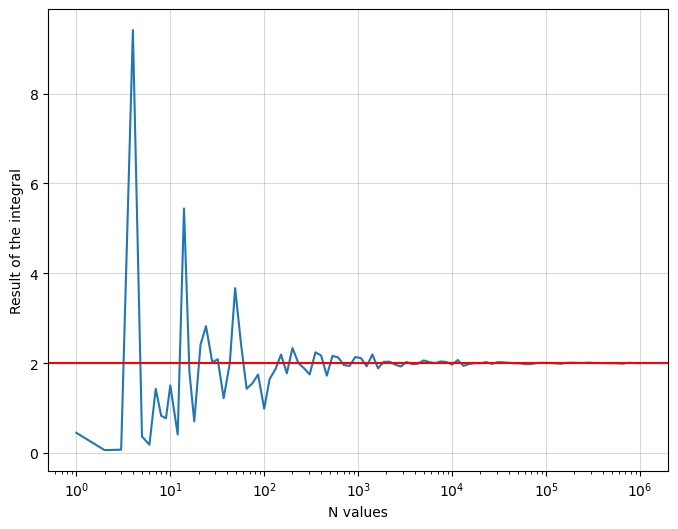

In [38]:
#What happens if N changes?    
n = np.unique(np.logspace(0,6,100,dtype=int))
integrals=[]

#I do the integration many times with different N
for i in range(0, len(n)):
    x = abs(np.random.normal(0, sigma, n[i]))
    integrals.append(np.mean(f(x, sigma)))

#Plot 
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.gca()
ax1.plot(n, integrals)
ax1.axhline(y = 2*sigma**4, color='red', label='True value')
ax1.set_xlabel("N values")
ax1.set_ylabel("Result of the integral")
ax1.legend
ax1.grid(c='grey', alpha = 0.3)
ax1.set_xscale('log')

As we expect the value of the integral converges to the true value by increasing the N values.

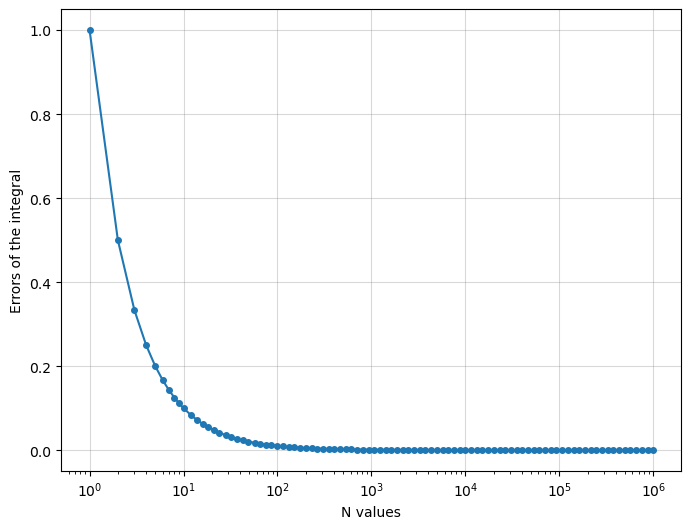

In [39]:
#Now we want to study how the error changes
errors= sigma/n

#Plot errors vs N values 
fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.gca()
ax2.plot(n, errors, marker = 'o', ms = 4)
ax2.set_xlabel("N values")
ax2.set_ylabel("Errors of the integral")
ax2.set_xscale('log')
ax2.grid(c='grey', alpha = 0.3)

As *N* increases, the error tends to zero because the result of the Monte Carlo integral tends to the true results 

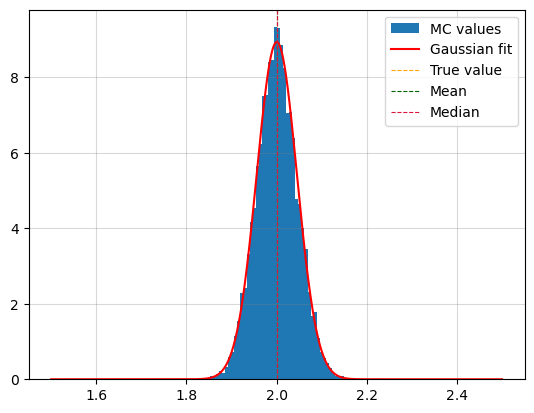

In [41]:
#We can also check if it looks like a gaussian 
#Do the integral many times
M = 10000
sigma = 1
integral = []

for i in np.arange(M):
    x = abs(np.random.normal(0, sigma, N))
    integral.append(np.mean(f(x, sigma)))
    
#Plot 
plt.hist(integral, density=True, bins=50, label = 'MC values')
gauss = scipy.stats.norm(loc=np.mean(integral), scale=np.std(integral))
x = np.linspace(1.5, 2.5, 1000)
plt.plot(x, gauss.pdf(x), c = 'red', label='Gaussian fit')
plt.axvline(2*sigma**4, lw = 0.8, ls = 'dashed', c = 'orange', label = 'True value')
plt.axvline(np.mean(integral), lw = 0.8, ls = 'dashed', c = 'darkgreen', label = 'Mean')
plt.axvline(np.median(integral), lw = 0.8, ls = 'dashed', c = 'crimson', label = 'Median')
plt.legend()
plt.grid(c='grey', alpha = 0.3)
plt.show()